In [1]:
# !pip install leafmap
# !pip install segment-geospatial

In [2]:
import leafmap
import os
from samgeo import SamGeo, tms_to_geotiff
import datetime
print(os.getcwd())

/Users/taohuang/Downloads


In [3]:
image="ortho_20240605_20240613_JDT4_RGB_8bit_clip_0.tif"

In [4]:
m = leafmap.Map( #height="600px"
                )
m.add_basemap("SATELLITE")
m.add_raster( image, layer_name="Image")
#m.add_layer_manager()
m

Map(center=[43.121801, -116.788162], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [5]:
sam_kwargs = {
    "points_per_side": 128,
    "pred_iou_thresh": 0.80,
    "stability_score_thresh": 0.90,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 10,
}

sam = SamGeo(
    model_type="vit_h",
    #model_type="vit_b",
    sam_kwargs=sam_kwargs,
)

In [6]:
current_time = datetime.datetime.now()
print(current_time)
sam.generate( image , output="mask.tif", foreground=True)
#sam.generate("image.tif", output="mask.tif", unique=True, foreground=True, batch=True, batch_sample_size= (576, 576) )
end_time = datetime.datetime.now()
print(   current_time.minute- end_time.minute )

2024-07-31 18:15:34.345788
-30


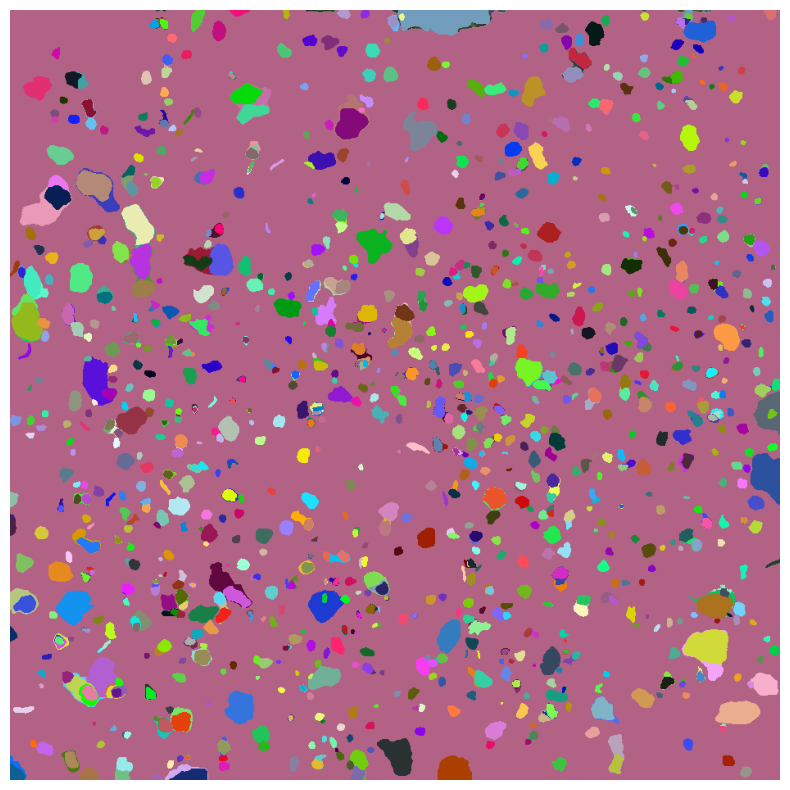

In [7]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")

In [8]:
sam.tiff_to_vector("annotations.tif", "ortho_20240605_20240613_JDT4_RGB_8bit_clip_0_annotations.shp")